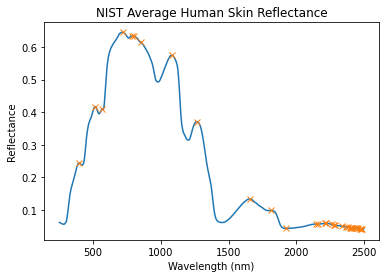

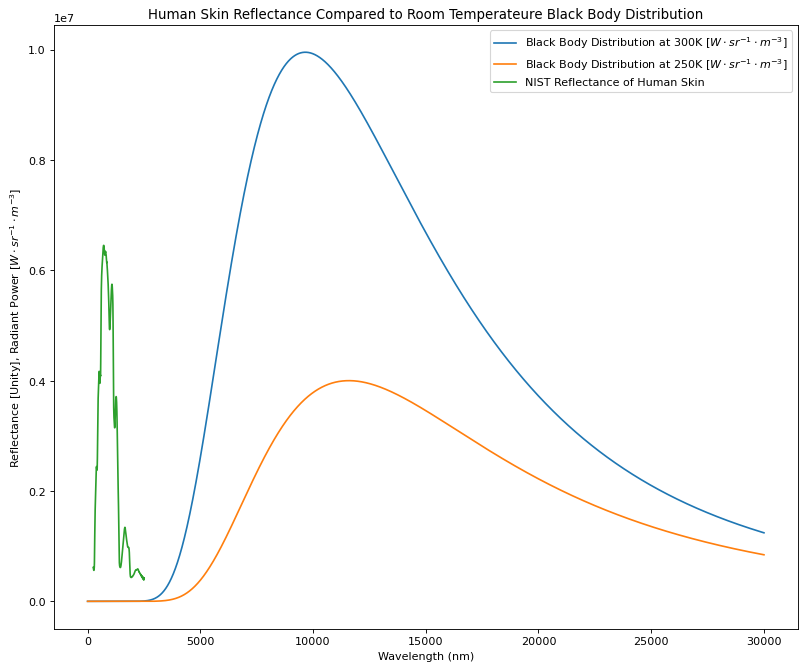

In [46]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math
from scipy.signal import find_peaks
from scipy.constants import k, h, c, sigma 

human_reflectance_df = pd.read_csv('1832_Data_JResNIST_skinrefl_v3.csv', header=7)
peaks, _ = find_peaks(human_reflectance_df['Average.15'], height=0)
plt.figure(1)
fig = plt.plot(human_reflectance_df['Wavelength (nm)'], human_reflectance_df['Average.15'])
plt.plot(human_reflectance_df['Wavelength (nm)'][peaks], human_reflectance_df['Average.15'][peaks], "x")
plt.title("NIST Average Human Skin Reflectance")
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
#print(human_reflectance_df['Wavelength (nm)'][peaks])
plt.figure(2, figsize=(12, 10), dpi=80)
blackBody = lambda wL, T: (2 * h * pow(c, 2) / pow(wL, 5)) * 1 / (np.exp(h * c / (wL * k * T)) - 1)
B = np.vectorize(blackBody)
blackBodyWavelength = np.linspace(1e-9, 30000e-9, 29999)
plt.plot(blackBodyWavelength * 1e9, B(blackBodyWavelength, 300))
plt.plot(blackBodyWavelength * 1e9, B(blackBodyWavelength, 250))
plt.plot(human_reflectance_df['Wavelength (nm)'], human_reflectance_df['Average.15'] * 1e7)
plt.title("Human Skin Reflectance Compared to Room Temperateure Black Body Distribution")
plt.ylabel("Reflectance [Unity], Radiant Power [$W \cdot sr^{-1} \cdot m^{-3}$]")
plt.xlabel("Wavelength (nm)")
plt.legend(("Black Body Distribution at 300K [$W \cdot sr^{-1} \cdot m^{-3}$]", "Black Body Distribution at 250K [$W \cdot sr^{-1} \cdot m^{-3}$]", "NIST Reflectance of Human Skin"))



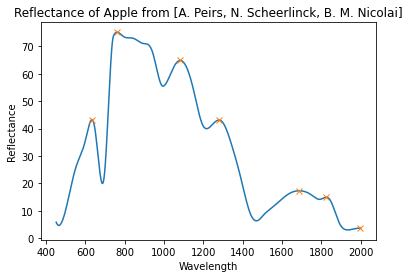

[ 632.41441441  761.11011011 1082.07407407 1280.54454454 1688.33933934
 1826.33833834 1995.34834835]


In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import find_peaks 

RR = [5.87, 10.50, 25.33, 35.21, 40.46, 22.86, 73, 74.13, 73.51, 72.90, 71.04, 67.95, 55.60, 55.60, 62.39, 64.25, 54.98, 41.39, 41.39, 42.63, 34.29, 21.62, 8.65, 7.19, 8.03, 11.12, 14.21, 16.68, 17.30, 16.06, 14.21, 14.21, 5.56, 3.09, 3.71, 3.71]

WL = [451, 500, 549, 598, 647, 696, 740, 745, 794, 843, 892, 941, 990, 1000, 1049, 1098, 1147, 1196, 1245, 1294, 1343, 1392, 1441, 1490, 1500, 1549, 1598, 1647, 1696, 1745, 1794, 1843, 1892, 1941, 1990, 2000]

cubicRR = interp1d(WL, RR, kind='cubic')
WLnew = np.linspace(451, 2000, num=1000, endpoint=True)

peaks, _ = find_peaks(cubicRR(WLnew), height=0)

plt.plot(WLnew, cubicRR(WLnew))
plt.plot(WLnew[peaks], cubicRR(WLnew)[peaks], "x")
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Reflectance of Apple from [A. Peirs, N. Scheerlinck, B. M. Nicolai]')
plt.show()
print(WLnew[peaks])